In [1]:
from allensdk.brain_observatory.behavior.behavior_project_cache import BehaviorProjectCache as bpc
from visual_behavior.translator.allensdk_sessions import sdk_utils
import visual_behavior.utilities as vbu

from visual_behavior import database as db

In [2]:

manifest_path = "/home/dougo/manifest.json" # pick a path
cache = bpc.from_lims(manifest=manifest_path)
ophys_sessions = cache.get_session_table() # This returns a dataframe you can filter

In [3]:
%widescreen

In [4]:
from visual_behavior.translator.allensdk_sessions import sdk_utils
ophys_sessions_filtered = sdk_utils.get_filtered_sessions_table(cache)
ophys_sessions_filtered

,behavior_session_id,ophys_experiment_id,project_code,session_name,session_type,equipment_name,date_of_acquisition,specimen_id,sex,age_in_days,full_genotype,reporter_line,driver_line,in_experiment_table,in_bsession_table,good_project_code,good_session,good_exp_workflow,good_container_workflow
ophys_session_id,,,,,,,,,,,,,,,,,,,
792619807,792680306,[792815735],VisualBehavior,20181210_412036_1imagesA,OPHYS_1_images_A,CAM2P.4,2018-12-10 21:19:50.000000,744911458,F,148.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],True,True,True,True,True,True
794918442,794968300,[795073741],VisualBehavior,20181213_412036_3imagesA,OPHYS_3_images_A,CAM2P.4,2018-12-13 21:11:17.000000,744911458,F,151.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],True,True,True,True,True,True
795625712,795742990,[795953296],VisualBehavior,20181214_412036_4imagesB,OPHYS_4_images_B,CAM2P.4,2018-12-14 20:17:05.000000,744911458,F,152.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],True,True,True,True,True,True
796044280,796052844,[796108483],VisualBehavior,20181215_412036_5imagesB,OPHYS_5_images_B_passive,CAM2P.4,2018-12-15 20:56:37.000000,744911458,F,153.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],True,True,True,True,True,True
796236521,796251270,[796308505],VisualBehavior,20181216_412036_6imagesB,OPHYS_6_images_B,CAM2P.4,2018-12-16 20:44:48.000000,744911458,F,154.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],True,True,True,True,True,True
798007990,798126878,[798404219],VisualBehavior,20181218_412036_2_images_passive,OPHYS_2_images_A_passive,CAM2P.4,2018-12-18 23:26:29.000000,744911458,F,156.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],True,True,True,True,True,True
825682242,825888541,[826587940],VisualBehavior,20190220_429952_1imagesA,OPHYS_1_images_A,CAM2P.4,2019-02-20 15:22:44.000000,791756323,M,131.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],True,True,True,True,True,True
829521794,829578829,[830093338],VisualBehavior,20190227_429952_4imagesB,OPHYS_4_images_B,CAM2P.4,2019-02-27 16:09:43.000000,791756323,M,138.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],True,True,True,True,True,True
830148632,830255592,[830700800],VisualBehavior,20190228_429952_5imagesB,OPHYS_5_images_B_passive,CAM2P.4,2019-02-28 15:42:08.000000,791756323,M,139.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],True,True,True,True,True,True


In [11]:
session_info = ophys_sessions_filtered.sample()
session_info

,behavior_session_id,ophys_experiment_id,project_code,session_name,session_type,equipment_name,date_of_acquisition,specimen_id,sex,age_in_days,full_genotype,reporter_line,driver_line,in_experiment_table,in_bsession_table,good_project_code,good_session,good_exp_workflow,good_container_workflow
ophys_session_id,,,,,,,,,,,,,,,,,,,
931564063,931955527,[932331541],VisualBehaviorTask1B,20190826_467951_1imagesB,OPHYS_1_images_B,CAM2P.3,2019-08-26 17:25:07.000000,879064141,M,132.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],True,True,True,True,True,True


In [12]:
oeid = session_info['ophys_experiment_id'].item()[0]
osid = sdk_utils.get_osid_from_oeid(oeid,cache)
osid

931564063

In [13]:
session = cache.get_session_data(oeid)

In [14]:
well_known_files = db.get_well_known_files(osid).set_index('name')
well_known_files

,id,size,content_type,filename,created_at,updated_at,storage_directory,well_known_file_type_id,file_source_id,published_at,workflow_state,attachable_id,attachable_type,id,created_at,updated_at
name,,,,,,,,,,,,,,,,
EyeDlcScreenMapping,990508353,48880976,application/x-hdf; charset=binary,931564063_eyetracking_dlc_to_screen_mapping.h5,2019-11-26 18:41:41.112138,2019-11-26 18:41:41.112138,/allen/programs/braintv/production/visualbehav...,916857994,None,None,None,931564063,OphysSession,916857994,2019-08-03 16:26:11.202016,2019-08-03 16:26:11.202016
EyeDlcOutputFile,990498529,236964505,application/x-hdf; charset=binary,931564063_video-1DeepCut_resnet50_universal_ey...,2019-11-26 18:21:12.893407,2019-11-26 18:21:12.893407,/allen/programs/braintv/production/visualbehav...,990460508,None,None,None,931564063,OphysSession,990460508,2019-11-26 16:47:20.006823,2019-11-26 16:47:20.006823
EyeTracking Ellipses,990498514,39106984,application/x-hdf; charset=binary,931564063_video-1.h5,2019-11-26 18:21:12.794640,2019-11-26 18:21:12.794640,/allen/programs/braintv/production/visualbehav...,914623492,None,None,None,931564063,OphysSession,914623492,2019-07-31 13:22:05.683874,2019-07-31 13:22:05.683874
RawBehaviorTrackingVideo,932334369,10267305612,video/x-msvideo; charset=binary,931564063_video-0.avi,2019-08-27 04:26:15.625287,2019-08-27 04:26:15.625287,/allen/programs/braintv/production/visualbehav...,695808672,None,None,None,931564063,OphysSession,695808672,2018-05-09 17:38:24.006153,2018-05-09 17:38:24.006153
RawEyeTrackingVideo,932334367,19250102886,video/x-msvideo; charset=binary,931564063_video-1.avi,2019-08-27 04:26:15.584144,2019-08-27 04:26:15.584144,/allen/programs/braintv/production/visualbehav...,695808172,None,None,None,931564063,OphysSession,695808172,2018-05-09 17:38:12.733419,2018-05-09 17:38:12.733419
OphysRigSync,932334365,13144237,application/x-hdf; charset=binary,931564063_sync.h5,2019-08-27 04:26:15.540218,2019-08-27 04:26:15.540218,/allen/programs/braintv/production/visualbehav...,610487713,None,None,None,931564063,OphysSession,610487713,2017-08-18 02:02:26.580050,2017-08-18 02:02:26.580050
StimulusPickle,932334363,29583364,text/plain; charset=us-ascii,931564063.pkl,2019-08-27 04:26:15.488181,2019-08-27 04:26:15.488181,/allen/programs/braintv/production/visualbehav...,610487715,None,None,None,931564063,OphysSession,610487715,2017-08-18 02:02:27.885973,2017-08-18 02:02:27.885973
OphysPlatformJson,932334361,3651,text/plain; charset=us-ascii,931564063_platform.json,2019-08-27 04:26:15.412044,2019-08-27 04:26:15.412044,/allen/programs/braintv/production/visualbehav...,746251277,None,None,None,931564063,OphysSession,746251277,2018-09-07 02:13:00.160665,2018-09-07 02:13:00.160665


In [15]:
sync_path = ''.join(well_known_files.loc['OphysRigSync'][['storage_directory', 'filename']].tolist())
sync_data = vbu.get_sync_data(sync_path)

In [16]:
behavior_video_path = ''.join(well_known_files.loc['RawBehaviorTrackingVideo'][['storage_directory', 'filename']].tolist())
behavior_video = vbu.Movie(behavior_video_path, sync_timestamps=sync_data['cam1_exposure_rising'])

In [17]:
sync_data.keys()

dict_keys(['2p_vsync_rising', '2p_vsync_falling', 'stim_vsync_rising', 'stim_vsync_falling', 'stim_photodiode_rising', 'stim_photodiode_falling', 'acq_trigger_rising', 'acq_trigger_falling', 'cam1_exposure_rising', 'cam1_exposure_falling', 'cam2_exposure_rising', 'cam2_exposure_falling', 'lick_sensor_rising', 'lick_sensor_falling'])

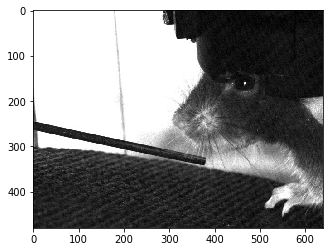

In [54]:
fig,ax=plt.subplots()
ax.imshow(behavior_video.get_frame(time=session.licks.sample()['time'].item()-0.05))

In [ ]:
session.licks['frame'] = session.licks['time'].map(lambda t:vbu.find_nearest_index(t,sync_data['cam1_exposure_rising']))

from functools import partial
get_lick_frame = partial(vbu.find_nearest_index, time_array=sync_data['cam1_exposure_rising'])
session

In [20]:
len(sync_data['cam1_exposure_rising'])

135726

In [21]:
len(session.licks)

2934

In [22]:
len(sync_data['lick_sensor_rising'])

2934

In [24]:
sync_data['lick_sensor_rising'][:10]

array([ 2.37075,  2.55258,  2.85491,  7.27152,  7.49158,  8.25892,
        9.13678, 17.88632, 24.69484, 24.86624])